In [1]:
from datetime import timedelta     #### 1
import pandas as pd
import numpy as np
import math
import cx_Oracle
import time
#import fbprophet
#from fbprophet import Prophet
#from fbprophet.plot import plot_plotly#
#import plotly.offline as py
from datetime import date
from datetime import datetime
#pip install -U scikit-learn

#from pmdarima import auto_arima


In [ ]:
#!!pip install prophet

In [ ]:
pip install pystan==2.19.1.1 prophet

In [2]:
from prophet import Prophet                                                                                         #### 2

In [ ]:
#from pmdarima import auto_arima
#!!pip install pmdarima

In [3]:
#to_wk = "202226"                                                                                                ##### 3 ontime 
#from_wk = "202001" 

conn = cx_Oracle.connect                       
sql_adi = """



C:\Users\shweta.sharma\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\shweta.sharma\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


<function Connection.close>

In [4]:
#to_wk = "202226"                                                                                               ##### 3 late  
#from_wk = "202001" 

conn = cx_Oracle.connect
sql_adi = """


C:\Users\shweta.sharma\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [6]:
adi_on

,LEGACY_COMPANY,FY_WW,ADI_FCD_ONTIME,SUM(FCD_TOTAL_LINES),SUM(FCD_LINES_ONTIME)/SUM(FCD_TOTAL_LINES)
0,ADI,202026,8556,11080,0.772202
1,ADI,202027,8999,12141,0.741207
2,ADI,202028,7264,10228,0.710207
3,ADI,202029,7075,9825,0.720102
4,ADI,202030,6371,8262,0.771121
...,...,...,...,...,...
158,ADI,202328,10134,11394,0.889415
159,ADI,202329,12674,13882,0.912981
160,ADI,202330,10445,11436,0.913344
161,ADI,202331,12170,13388,0.909023


In [4]:
adi_lat.tail()

NameError: name 'adi_lat' is not defined

In [ ]:
df['Year'] =df['Time date'].apply(lambda x:str(x)[-4:])
df['Month'] =df['Time date'].apply(lambda x:str(x)[-6:-4])
df['Day'] =df['Time date'].apply(lambda x:str(x)[-6:])
df['ds'] = pd.DatetimeIndex(df['Year'] +'-'+df['Month']+'-'+df['Day'])

In [ ]:

adi_on

In [ ]:
dmcls                                                                                                                    #### 4

In [5]:
dmc= dmcls[['WK_BGN_DT','FY_WW']]                                                                                    #### 5

In [6]:
adi_on['FY_WW'] = adi_on.FY_WW.apply(lambda x: x[:4]+'_W'+x[4:])                                                    #### 6

In [7]:
df= pd.merge(adi_on, dmcls, how = 'left', on='FY_WW')                                                               #### 7
df.drop(['FY_WW'],axis =1, inplace =True)
df

,LEGACY_COMPANY,ADI_FCD_ONTIME,SUM(FCD_TOTAL_LINES),SUM(FCD_LINES_ONTIME)/SUM(FCD_TOTAL_LINES),WK_BGN_DT,RN
0,ADI,8556,11080,0.772202,2020-04-26,1
1,ADI,8998,12140,0.741186,2020-05-03,1
2,ADI,7264,10228,0.710207,2020-05-10,1
3,ADI,7075,9825,0.720102,2020-05-17,1
4,ADI,6371,8262,0.771121,2020-05-24,1
...,...,...,...,...,...,...
159,ADI,12674,13882,0.912981,2023-05-14,1
160,ADI,10445,11436,0.913344,2023-05-21,1
161,ADI,12170,13387,0.909091,2023-05-28,1
162,ADI,11003,12499,0.880310,2023-06-04,1


In [ ]:
df

In [ ]:
#adi_on.drop(['LEGACY_COMPANY','SUM(FCD_TOTAL_LINES)','SUM(FCD_LINES_ONTIME)/SUM(FCD_TOTAL_LINES)'],axis=1,inplace =True)
#adi_on

In [8]:
# Multivariate                                                                                                          #### 8
AD_ot= df.reset_index()[['WK_BGN_DT','ADI_FCD_ONTIME']].rename({'WK_BGN_DT':'ds','ADI_FCD_ONTIME':'y'},axis='columns')

In [13]:
AD_ot

,ds,y
0,2020-04-26,8556
1,2020-05-03,8998
2,2020-05-10,7264
3,2020-05-17,7075
4,2020-05-24,6371
...,...,...
159,2023-05-14,12674
160,2023-05-21,10445
161,2023-05-28,12170
162,2023-06-04,11003


In [ ]:
#AD_OT=df.set_index(['WK_BGN_DT'])
#df.columns =['y','ds']


In [ ]:
df.tail()

In [ ]:
#train=M_df2[(M_df2['ds']>='2020-04-26')&(M_df2['ds']<='2022-04-26')]
#test=M_df2[(M_df2['ds']>'2022-04-26')]

In [ ]:
#train.shape

In [ ]:
#test.shape

In [14]:
###Train Model                                                                                                          #### 9
Train_model=Prophet(interval_width=0.95,weekly_seasonality =True) 
model=Train_model.fit(AD_ot)

19:45:25 - cmdstanpy - INFO - Chain [1] start processing
19:45:25 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
#Train_mo.add_regressor('ADI_FCD_ONTIME',standardize =False)

In [15]:
#Forecast                                                                                                              ##### 10
future1=Train_model.make_future_dataframe(periods=45,freq='W')
forecast1=Train_model.predict(future1)                             
forecast1.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
204,2024-03-24,7080.276988,5350.390361,12140.346921,6430.556541,7694.317862,1600.109945,1600.109945,1600.109945,1726.0526,1726.0526,1726.0526,-125.942654,-125.942654,-125.942654,0.0,0.0,0.0,8680.386933
205,2024-03-31,7089.631360,5558.950580,11987.288141,6411.140645,7723.352478,1629.394758,1629.394758,1629.394758,1726.0526,1726.0526,1726.0526,-96.657841,-96.657841,-96.657841,0.0,0.0,0.0,8719.026118
206,2024-04-07,7098.985731,5430.563162,12092.636218,6402.122180,7743.518197,1643.645798,1643.645798,1643.645798,1726.0526,1726.0526,1726.0526,-82.406801,-82.406801,-82.406801,0.0,0.0,0.0,8742.631530
207,2024-04-14,7108.340103,5368.765185,12098.951084,6394.025669,7776.690622,1656.202534,1656.202534,1656.202534,1726.0526,1726.0526,1726.0526,-69.850066,-69.850066,-69.850066,0.0,0.0,0.0,8764.542637
208,2024-04-21,7117.694475,5590.819285,12323.395522,6385.954101,7809.740744,1716.060077,1716.060077,1716.060077,1726.0526,1726.0526,1726.0526,-9.992523,-9.992523,-9.992523,0.0,0.0,0.0,8833.754551


In [ ]:
forecast1.tail()

In [13]:
model.component_modes                                                                                                 ##### 11

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

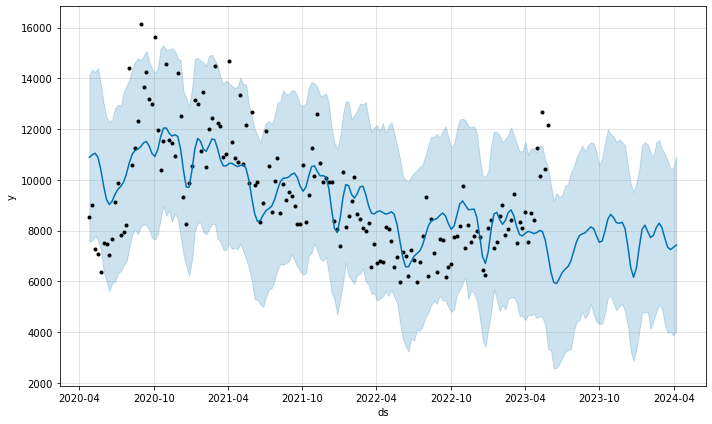

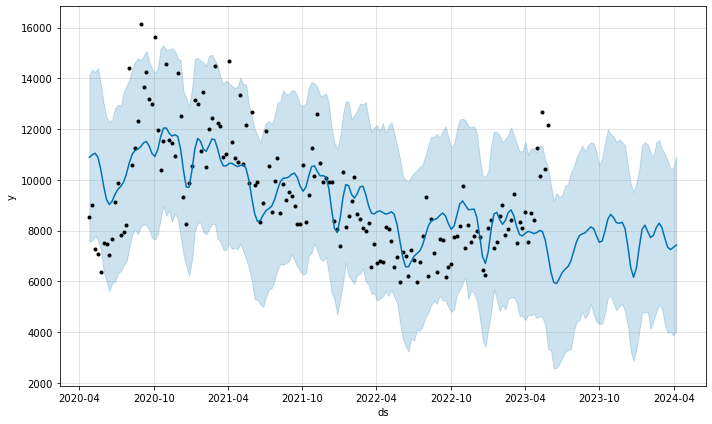

In [14]:
model.plot(forecast1)

In [17]:
from prophet.diagnostics import cross_validation                                                                       #### 12

In [18]:
                                                                                                                       #### 13
df_cv =cross_validation(model,initial='600 days',period='150days',horizon='300 days')    
df_cv.head()

  0%|          | 0/2 [00:00<?, ?it/s]

19:46:04 - cmdstanpy - INFO - Chain [1] start processing
19:46:05 - cmdstanpy - INFO - Chain [1] done processing
19:46:05 - cmdstanpy - INFO - Chain [1] start processing
19:46:05 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-03-20,8172.377041,5326.032495,11181.768674,6564,2022-03-18
1,2022-03-27,8540.616919,5621.867196,11600.786577,7476,2022-03-18
2,2022-04-03,8840.008868,6017.620860,11945.256615,6728,2022-03-18
3,2022-04-10,8605.184806,5579.666320,11459.277800,6795,2022-03-18
4,2022-04-17,7839.394379,4695.497533,10765.892440,6751,2022-03-18


In [19]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-03-20,8172.377041,5326.032495,11181.768674,6564,2022-03-18
1,2022-03-27,8540.616919,5621.867196,11600.786577,7476,2022-03-18
2,2022-04-03,8840.008868,6017.620860,11945.256615,6728,2022-03-18
3,2022-04-10,8605.184806,5579.666320,11459.277800,6795,2022-03-18
4,2022-04-17,7839.394379,4695.497533,10765.892440,6751,2022-03-18
...,...,...,...,...,...,...
81,2023-05-14,4053.277550,1043.257451,6987.342244,12674,2022-08-15
82,2023-05-21,3650.545711,367.584435,6897.993356,10445,2022-08-15
83,2023-05-28,3347.134973,605.128588,6374.812969,12170,2022-08-15
84,2023-06-04,3228.174439,218.613726,6270.665247,11003,2022-08-15


In [13]:
from sklearn.metrics import mean_squared_error                                                                           #### 14
import math

In [14]:
from prophet.diagnostics import performance_metrics                                                                  ##### 14(a)
df_ot=performance_metrics(df_cv)
df_ot.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,27 days,1.634457e+06,1278.458989,1153.692660,0.167462,0.156717,0.151588,1.0
1,30 days,2.202808e+06,1484.186016,1318.037885,0.195048,0.207098,0.173549,1.0
2,34 days,1.965291e+06,1401.888443,1206.501823,0.174692,0.156717,0.156106,1.0
3,37 days,2.579191e+06,1605.985915,1456.011865,0.212190,0.226255,0.187877,1.0
4,41 days,2.626082e+06,1620.519186,1494.403864,0.217932,0.226255,0.192835,1.0


In [ ]:
from prophet.plot import plot_cross_validation_metric
figure=plot_cross_validation_metric(df_cv,metric='rmse')


In [15]:
ADI_OT_ = forecast1[['ds','yhat']]                                                                                    ##### 15

In [16]:
ADI_OT_Fcst=ADI_OT_.rename(columns={"ds":"WK_BGN_DT","yhat":"FCD_OT"})                                                ##### 16

In [17]:
ADI_OT_Fcst

,WK_BGN_DT,FCD_OT
0,2020-04-26,10890.428596
1,2020-05-03,10987.760819
2,2020-05-10,11052.968512
3,2020-05-17,10888.012619
4,2020-05-24,10409.167251
...,...,...
202,2024-03-10,7694.269552
203,2024-03-17,7346.159959
204,2024-03-24,7251.117394
205,2024-03-31,7343.804979


In [76]:
dp_fcast =ADI_OT_Fcst.tail(64)                                                                                        ##### 17
#print(ADI_OT_Fcst)
dp_fcast

,WK_BGN_DT,FCD_OT
143,2023-01-22,8722.824812
144,2023-01-29,8436.340170
145,2023-02-05,8249.470052
146,2023-02-12,8398.324861
147,2023-02-19,8706.653120
...,...,...
202,2024-03-10,7694.269552
203,2024-03-17,7346.159959
204,2024-03-24,7251.117394
205,2024-03-31,7343.804979


In [ ]:
#ADI_OT= ADI_OT_.rename({'ds':'FY_WW','yhat':'FCD_ONTIME'})
#ADI_OT.reset_index('FY_WW')
ADI_OT_.to_excel('ADI1.xlsx')

### ADI NOT ONTIME

In [ ]:
#dmcls_ = dmcls1[['WK_BGN_DT','FY_WW']]                                                                                 

In [22]:
adi_lat['FY_WW'] = adi_lat.FY_WW.apply(lambda x: x[:4]+'_W'+x[4:])                                                      #### 18

In [23]:
df1= pd.merge(adi_lat, dmcls, how = 'left', on='FY_WW')                                                                #### 19
df1.drop(['FY_WW'],axis =1, inplace =True)
df1

,LEGACY_COMPANY,ADI_FCD_LATE,SUM(FCD_TOTAL_LINES),SUM(FCD_LINES_LATE)/SUM(FCD_TOTAL_LINES),WK_BGN_DT,RN
0,ADI,2524,11077,0.227860,2020-04-26,1
1,ADI,3142,12138,0.258856,2020-05-03,1
2,ADI,2964,10226,0.289849,2020-05-10,1
3,ADI,2750,9813,0.280240,2020-05-17,1
4,ADI,1891,8257,0.229018,2020-05-24,1
...,...,...,...,...,...,...
157,ADI,2047,13306,0.153840,2023-04-30,1
158,ADI,1260,11394,0.110585,2023-05-07,1
159,ADI,1208,13882,0.087019,2023-05-14,1
160,ADI,991,11436,0.086656,2023-05-21,1


In [24]:
AD_not= df1.reset_index()[['WK_BGN_DT','ADI_FCD_LATE']].rename({'WK_BGN_DT':'ds','ADI_FCD_LATE':'y'},axis='columns')     #### 21

In [25]:
Train_model=Prophet(interval_width=0.95,weekly_seasonality =True)                                                     #### 22
model=Train_model.fit(AD_not)

09:54:53 - cmdstanpy - INFO - Chain [1] start processing
09:54:53 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
#Forecast                                                                                                            #### 23
future2=Train_model.make_future_dataframe(periods=45,freq='W')
forecast2=Train_model.predict(future2)
forecast2.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
202,2024-03-10,213.523141,-2429.346493,539.871882,-414.881385,898.432021,-1240.348593,-1240.348593,-1240.348593,-1174.61603,-1174.61603,-1174.61603,-65.732563,-65.732563,-65.732563,0.0,0.0,0.0,-1026.825452
203,2024-03-17,161.828703,-2546.911945,413.324162,-490.581719,873.913149,-1271.415610,-1271.415610,-1271.415610,-1174.61603,-1174.61603,-1174.61603,-96.799580,-96.799580,-96.799580,0.0,0.0,0.0,-1109.586907
204,2024-03-24,110.134265,-2617.299183,420.801115,-566.282053,847.204908,-1318.043710,-1318.043710,-1318.043710,-1174.61603,-1174.61603,-1174.61603,-143.427680,-143.427680,-143.427680,0.0,0.0,0.0,-1207.909445
205,2024-03-31,58.439826,-2841.305993,254.047368,-641.982388,819.804043,-1350.348751,-1350.348751,-1350.348751,-1174.61603,-1174.61603,-1174.61603,-175.732721,-175.732721,-175.732721,0.0,0.0,0.0,-1291.908925
206,2024-04-07,6.745388,-2754.711573,182.180034,-716.035393,794.392480,-1302.923603,-1302.923603,-1302.923603,-1174.61603,-1174.61603,-1174.61603,-128.307572,-128.307572,-128.307572,0.0,0.0,0.0,-1296.178215


In [26]:
forecast2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-04-26,2124.987540,269.642693,3012.974590,2124.987540,2124.987540,-507.857585,-507.857585,-507.857585,-1174.61603,-1174.61603,-1174.61603,666.758445,666.758445,666.758445,0.0,0.0,0.0,1617.129955
1,2020-05-03,2164.938527,636.971236,3240.884996,2164.938527,2164.938527,-264.917380,-264.917380,-264.917380,-1174.61603,-1174.61603,-1174.61603,909.698650,909.698650,909.698650,0.0,0.0,0.0,1900.021147
2,2020-05-10,2204.889514,530.731698,3358.564334,2204.889514,2204.889514,-249.160214,-249.160214,-249.160214,-1174.61603,-1174.61603,-1174.61603,925.455816,925.455816,925.455816,0.0,0.0,0.0,1955.729300
3,2020-05-17,2244.840501,597.517721,3275.400555,2244.840501,2244.840501,-406.376900,-406.376900,-406.376900,-1174.61603,-1174.61603,-1174.61603,768.239130,768.239130,768.239130,0.0,0.0,0.0,1838.463602
4,2020-05-24,2284.791488,257.524299,3086.840469,2284.791488,2284.791488,-578.587252,-578.587252,-578.587252,-1174.61603,-1174.61603,-1174.61603,596.028778,596.028778,596.028778,0.0,0.0,0.0,1706.204236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2024-03-10,213.523141,-2562.162281,450.096184,-349.442829,807.474237,-1240.348593,-1240.348593,-1240.348593,-1174.61603,-1174.61603,-1174.61603,-65.732563,-65.732563,-65.732563,0.0,0.0,0.0,-1026.825452
203,2024-03-17,161.828703,-2588.396452,403.568710,-426.102859,783.968398,-1271.415610,-1271.415610,-1271.415610,-1174.61603,-1174.61603,-1174.61603,-96.799580,-96.799580,-96.799580,0.0,0.0,0.0,-1109.586907
204,2024-03-24,110.134265,-2717.539498,377.789358,-503.461168,760.118195,-1318.043710,-1318.043710,-1318.043710,-1174.61603,-1174.61603,-1174.61603,-143.427680,-143.427680,-143.427680,0.0,0.0,0.0,-1207.909445
205,2024-03-31,58.439826,-2791.022940,228.602278,-581.070902,728.005417,-1350.348751,-1350.348751,-1350.348751,-1174.61603,-1174.61603,-1174.61603,-175.732721,-175.732721,-175.732721,0.0,0.0,0.0,-1291.908925


In [27]:
ADI_NOT_ = forecast2[['ds','yhat']]                                                                                 #### 24

In [28]:
ADI_NOT_Fcst=ADI_NOT_.rename(columns={"ds":"WK_BGN_DT","yhat":"FCD_LATE"})                                             #### 25

In [29]:
ADI_NOT_Fcst

,WK_BGN_DT,FCD_LATE
0,2020-04-26,1617.129955
1,2020-05-03,1900.021147
2,2020-05-10,1955.729300
3,2020-05-17,1838.463602
4,2020-05-24,1706.204236
...,...,...
202,2024-03-10,-1026.825452
203,2024-03-17,-1109.586907
204,2024-03-24,-1207.909445
205,2024-03-31,-1291.908925


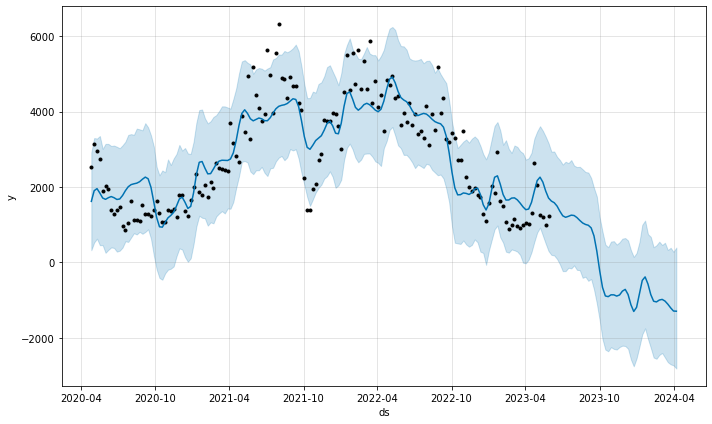

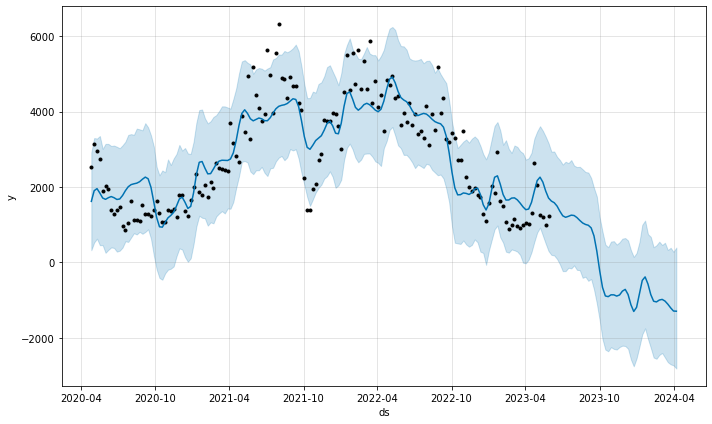

In [33]:
model.plot(forecast2)

In [30]:
from prophet.diagnostics import cross_validation                                                                     ####26

In [24]:
df_cv1 =cross_validation(model,initial='600 days',period='150 days',horizon='300 days')                                 #### 27
df_cv1.tail()

  0%|          | 0/2 [00:00<?, ?it/s]

21:50:16 - cmdstanpy - INFO - Chain [1] start processing
21:50:16 - cmdstanpy - INFO - Chain [1] done processing
21:50:17 - cmdstanpy - INFO - Chain [1] start processing
21:50:17 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
81,2023-05-14,4053.277550,1021.660004,7004.904282,12674,2022-08-15
82,2023-05-21,3650.545711,793.673773,6960.999614,10445,2022-08-15
83,2023-05-28,3347.134973,6.164932,6360.514589,12170,2022-08-15
84,2023-06-04,3228.174439,183.265799,6063.857669,11003,2022-08-15
85,2023-06-11,3248.080984,193.579317,6316.146369,11428,2022-08-15


In [32]:
df_cv1

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-03-06,4898.601730,3498.341457,6120.108170,4607,2022-03-04
1,2022-03-13,4888.512506,3672.295885,6158.430033,5861,2022-03-04
2,2022-03-20,5006.911844,3657.958823,6253.987638,4236,2022-03-04
3,2022-03-27,5204.195749,3859.496921,6444.889543,4800,2022-03-04
4,2022-04-03,5376.406283,4151.276538,6578.997178,4120,2022-03-04
...,...,...,...,...,...,...
81,2023-04-30,5337.008773,4016.349271,6803.573460,2047,2022-08-01
82,2023-05-07,5642.584241,4282.642553,7129.060741,1260,2022-08-01
83,2023-05-14,5684.265085,4261.125530,7159.702007,1208,2022-08-01
84,2023-05-21,5484.655154,4081.814396,6951.120314,991,2022-08-01


In [33]:
from prophet.diagnostics import performance_metrics                                                                 #### 28
df_not=performance_metrics(df_cv1)
df_not.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,27 days,9.373322e+05,968.159166,868.769286,0.218931,0.173958,0.195436,0.875
1,30 days,1.124023e+06,1060.199424,989.369855,0.249138,0.204783,0.220843,0.750
2,34 days,7.670287e+05,875.801759,833.887701,0.194512,0.173958,0.180983,0.875
3,37 days,7.969429e+05,892.716581,848.401497,0.204509,0.204783,0.185738,0.875
4,41 days,7.033665e+05,838.669456,764.997155,0.182579,0.161517,0.166549,0.875


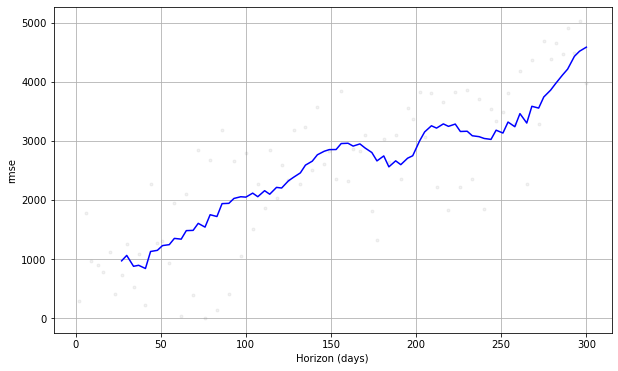

In [34]:
from prophet.plot import plot_cross_validation_metric                                                                #### 29
figure1=plot_cross_validation_metric(df_cv1,metric='rmse')


In [35]:
ADI_NOT_ = forecast2[['ds','yhat']]                                                                                   #### 30

In [36]:
ADI_NOT_

,ds,yhat
0,2020-04-26,1617.129955
1,2020-05-03,1900.021147
2,2020-05-10,1955.729300
3,2020-05-17,1838.463602
4,2020-05-24,1706.204236
...,...,...
202,2024-03-10,-1026.825452
203,2024-03-17,-1109.586907
204,2024-03-24,-1207.909445
205,2024-03-31,-1291.908925


In [37]:
ADI_NOT_Fcst=ADI_NOT_.rename(columns={"ds":"WK_BGN_DT","yhat":"FCD_NOT"})                                             #### 31

In [74]:
dp_fcast1 =ADI_NOT_Fcst.tail(64)                                                                                    #### 32

In [75]:
dp_fcast1

,WK_BGN_DT,FCD_NOT
143,2023-01-22,2294.854410
144,2023-01-29,2072.800265
145,2023-02-05,1798.004691
146,2023-02-12,1652.402577
147,2023-02-19,1654.892784
...,...,...
202,2024-03-10,-1026.825452
203,2024-03-17,-1109.586907
204,2024-03-24,-1207.909445
205,2024-03-31,-1291.908925


In [103]:
#6-feb-2023' AND '10-dec-2023
  ## 3-feb
    #60

In [58]:
ADI_OT1                                                              #### 34

,WK_BGN_DT,FY_WW,LEGACY_COMPANY,TOT_LINES,OT_LINES,NOT_OT_LINES
0,2023-01-22,2023_W13,ADI,11219,9964,1255
1,2023-01-29,2023_W14,ADI,10931,9712,1219
2,2023-02-05,2023_W15,ADI,11044,9634,1410
3,2023-02-12,2023_W16,ADI,9241,8132,1109
4,2023-02-19,2023_W17,ADI,9366,8325,1041
5,2023-02-26,2023_W18,ADI,9898,8888,1010
6,2023-03-05,2023_W19,ADI,10908,9702,1206
7,2023-03-12,2023_W20,ADI,8869,7998,871
8,2023-03-19,2023_W21,ADI,9978,9040,938
9,2023-03-26,2023_W22,ADI,9309,8405,904


In [59]:
ADI_ONT=ADI_OT1.loc[:,["WK_BGN_DT", "FY_WW", "OT_LINES"]]                                              ##### 35

In [60]:
ADI_late=ADI_OT1.loc[:,['WK_BGN_DT', 'FY_WW', 'NOT_OT_LINES']]                                             ##### 36

In [61]:
ADI_late                                                                                                 #### 37

,WK_BGN_DT,FY_WW,NOT_OT_LINES
0,2023-01-22,2023_W13,1255
1,2023-01-29,2023_W14,1219
2,2023-02-05,2023_W15,1410
3,2023-02-12,2023_W16,1109
4,2023-02-19,2023_W17,1041
5,2023-02-26,2023_W18,1010
6,2023-03-05,2023_W19,1206
7,2023-03-12,2023_W20,871
8,2023-03-19,2023_W21,938
9,2023-03-26,2023_W22,904


In [77]:
df_final_OT_=pd.merge(dp_fcast,ADI_ONT,how='inner',on='WK_BGN_DT')                                          #### 38

In [78]:
df_final_NOT=pd.merge(dp_fcast1,ADI_late,how='inner',on='WK_BGN_DT')                                      ##### 39

In [79]:
dfff1=pd.merge(df_final_OT_,df_final_NOT,how='inner',on='WK_BGN_DT')                                      ##### 40


In [80]:
dfff1                                                                                                  ##### 41

,WK_BGN_DT,FCD_OT,FY_WW_x,OT_LINES,FCD_NOT,FY_WW_y,NOT_OT_LINES
0,2023-01-22,8722.824812,2023_W13,9964,2294.854410,2023_W13,1255
1,2023-01-29,8436.340170,2023_W14,9712,2072.800265,2023_W14,1219
2,2023-02-05,8249.470052,2023_W15,9634,1798.004691,2023_W15,1410
3,2023-02-12,8398.324861,2023_W16,8132,1652.402577,2023_W16,1109
4,2023-02-19,8706.653120,2023_W17,8325,1654.892784,2023_W17,1041
5,2023-02-26,8819.265400,2023_W18,8888,1704.430318,2023_W18,1010
6,2023-03-05,8577.171457,2023_W19,9702,1710.590185,2023_W19,1206
7,2023-03-12,8151.070057,2023_W20,7998,1657.790940,2023_W20,871
8,2023-03-19,7841.607680,2023_W21,9040,1570.772469,2023_W21,938
9,2023-03-26,7791.363441,2023_W22,8405,1472.031598,2023_W22,904


In [81]:
dfff1['OT_Hybrid']=dfff1['FCD_OT']*0.1+dfff1['OT_LINES']*0.9                                                   #### 42

In [82]:
dfff1['NOT_Hybrid']=dfff1['FCD_NOT']*0.1+dfff1['NOT_OT_LINES']*0.9                                           ##### 43

In [83]:
dfff1['Percent']=dfff1['OT_Hybrid']/(dfff1['OT_Hybrid']+dfff1['NOT_Hybrid'])*100                                ##### 44

In [84]:
dfff1                                                                                                           ##### 45

,WK_BGN_DT,FCD_OT,FY_WW_x,OT_LINES,FCD_NOT,FY_WW_y,NOT_OT_LINES,OT_Hybrid,NOT_Hybrid,Percent
0,2023-01-22,8722.824812,2023_W13,9964,2294.854410,2023_W13,1255,9839.882481,1358.985441,87.864975
1,2023-01-29,8436.340170,2023_W14,9712,2072.800265,2023_W14,1219,9584.434017,1304.380026,88.020917
2,2023-02-05,8249.470052,2023_W15,9634,1798.004691,2023_W15,1410,9495.547005,1448.800469,86.762112
3,2023-02-12,8398.324861,2023_W16,8132,1652.402577,2023_W16,1109,8158.632486,1163.340258,87.520450
4,2023-02-19,8706.653120,2023_W17,8325,1654.892784,2023_W17,1041,8363.165312,1102.389278,88.353675
5,2023-02-26,8819.265400,2023_W18,8888,1704.430318,2023_W18,1010,8881.126540,1079.443032,89.162838
6,2023-03-05,8577.171457,2023_W19,9702,1710.590185,2023_W19,1206,9589.517146,1256.459018,88.415436
7,2023-03-12,8151.070057,2023_W20,7998,1657.790940,2023_W20,871,8013.307006,949.679094,89.404434
8,2023-03-19,7841.607680,2023_W21,9040,1570.772469,2023_W21,938,8920.160768,1001.277247,89.907942
9,2023-03-26,7791.363441,2023_W22,8405,1472.031598,2023_W22,904,8343.636344,960.803160,89.673713


In [85]:
dfff1['%_Pegging_Only']=dfff1['OT_LINES']/(dfff1['OT_LINES']+dfff1['NOT_OT_LINES'])*100                               #### 46

In [86]:
dfff1['%_Fcst_Only']=dfff1['FCD_OT']/(dfff1['FCD_OT']+dfff1['FCD_NOT'])*100                                        #### 47

In [87]:
dfff1                                                                                                            #### 48

,WK_BGN_DT,FCD_OT,FY_WW_x,OT_LINES,FCD_NOT,FY_WW_y,NOT_OT_LINES,OT_Hybrid,NOT_Hybrid,Percent,%_Pegging_Only,%_Fcst_Only
0,2023-01-22,8722.824812,2023_W13,9964,2294.854410,2023_W13,1255,9839.882481,1358.985441,87.864975,88.813620,79.171163
1,2023-01-29,8436.340170,2023_W14,9712,2072.800265,2023_W14,1219,9584.434017,1304.380026,88.020917,88.848230,80.276215
2,2023-02-05,8249.470052,2023_W15,9634,1798.004691,2023_W15,1410,9495.547005,1448.800469,86.762112,87.232887,82.104910
3,2023-02-12,8398.324861,2023_W16,8132,1652.402577,2023_W16,1109,8158.632486,1163.340258,87.520450,87.999134,83.559373
4,2023-02-19,8706.653120,2023_W17,8325,1654.892784,2023_W17,1041,8363.165312,1102.389278,88.353675,88.885330,84.028515
5,2023-02-26,8819.265400,2023_W18,8888,1704.430318,2023_W18,1010,8881.126540,1079.443032,89.162838,89.795918,83.803881
6,2023-03-05,8577.171457,2023_W19,9702,1710.590185,2023_W19,1206,9589.517146,1256.459018,88.415436,88.943894,83.372572
7,2023-03-12,8151.070057,2023_W20,7998,1657.790940,2023_W20,871,8013.307006,949.679094,89.404434,90.179276,83.099047
8,2023-03-19,7841.607680,2023_W21,9040,1570.772469,2023_W21,938,8920.160768,1001.277247,89.907942,90.599319,83.311634
9,2023-03-26,7791.363441,2023_W22,8405,1472.031598,2023_W22,904,8343.636344,960.803160,89.673713,90.288968,84.109157


In [20]:
dfff1.to_excel('ADI_FCD_NEW_2023_jan_dec@.xlsx')

In [ ]:
################################################# FINISH ##############################################################

## pegging

In [ ]:
ADI_OT1

In [ ]:
ADI_OT1.columns=['WK_BGN_DT', 'FY_WW', 'FCD_OT_Pegged']

In [ ]:
ADI_NOT.columns=['WK_BGN_DT', 'FY_WW', 'FCD_LATE_Pegged']

In [ ]:
ADI_OT1

In [ ]:
df_final_OT=pd.merge(dp_fcast,ADI_OT1,how='inner',on='WK_BGN_DT')

In [ ]:
df_final_NOT_=pd.merge(dp_fcast1,ADI_NOT,how='inner',on='WK_BGN_DT')

In [ ]:
dfff=pd.merge(df_final_OT,df_final_NOT_,how='inner',on='WK_BGN_DT')

In [ ]:
dfff

In [ ]:
dfff['OT_Hybrid']=dfff['FCD_OT']*0.1+dfff['FCD_OT_Pegged']*0.9

In [ ]:
dfff['NOT_Hybrid']=dfff['FCD_NOT']*0.1+dfff['FCD_LATE_Pegged']*0.9

In [ ]:
dfff

In [ ]:
dfff['Percent']=dfff['OT_Hybrid']/(dfff['OT_Hybrid']+dfff['NOT_Hybrid'])*100

In [ ]:
dfff

In [ ]:
dfff['%_Pegging_Only']=dfff['FCD_OT_Pegged']/(dfff['FCD_OT_Pegged']+dfff['FCD_LATE_Pegged'])*100

In [ ]:
dfff['%_Fcst_Only']=dfff['FCD_OT']/(dfff['FCD_OT']+dfff['FCD_NOT'])*100

In [ ]:
dfff

In [ ]:
dfff.to_excel('ADI_FCD_NEW_80.xlsx')

In [ ]:
forecast.tail()

In [ ]:
forecast[['ds','yhat']]

In [ ]:
AD_ot1=adi_on[['LEGACY_COMPANY','FY_WW','ADI_FCD_ONTIME']]         ###### 5
AD_ot1

In [ ]:
AD_lat1=adi_lat[['LEGACY_COMPANY','FY_WW','ADI_FCD_LATE']]         ###### 5
AD_lat1

In [ ]:
df_ADI= pd.merge(AD_ot1, AD_lat1, how = 'left', on='FY_WW')

df_ADI

In [ ]:
a=df_ADI.drop(df_ADI.columns[[-2]], axis=1)

In [ ]:
A['FY_WW'] =pd.to_datetime(a['FY_WW'])

In [ ]:
#a['FY_WW'] =pd.to_datetime(a['FY_WW'])
a['FY_WW']=pd.to_numeric(a['FY_WW'])

In [ ]:
adi=a.rename(columns={'FY_WW':'Date'})


In [ ]:
#ad=adi.set_index('Date')
a['ADI_FCD_ONTIME'].plot(figsize=(12,5))

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:

def ad_test(dataset):
     atest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",atest[0])
     print("2. P-Value : ", atest[1])
     print("3. Num Of Lags : ", atest[2])
     print("4. Num Of Observations Used For ADF Regression:", atest[3])
     print("5. Critical Values :")
     for key, val in atest[4].items():
         print("\t",key, ": ", val)


In [ ]:
ad_test(a['ADI_FCD_ONTIME'])

In [ ]:
#from pmdarima import auto_arima
stepwise_fit = auto_arima(a['ADI_FCD_ONTIME'], trace=True,
suppress_warnings=True)

In [ ]:
print(a.shape)
train=a.iloc[:-40]
test=a.iloc[-40:]
print(train.shape,test.shape)

In [ ]:
Train = a.iloc[1:103]

Test = a.iloc[104:]
model3 = ARIMA(Train['ADI_FCD_ONTIME'], order = (0,1,1))

model4 =model3.fit()
#model = ARIMA(train['Total_Issue_quantities'], order = (5,0,4))

#model = model_armax.fit(disp = 0)

In [ ]:
#from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [ ]:

model_=sm.tsa.arima.ARIMA(train['ADI_FCD_ONTIME'], order=(0,1,1))
model_re1=model.fit()
#model.summary()

In [ ]:
start = len(train)

end = len(train)+len(test)-1

pred = model.predict(start =start , end =end)

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model_re.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['ADI_FCD_ONTIME'].plot(legend=True)